___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [56]:
import pandas as pd
import nltk
from  sklearn.feature_extraction.text import CountVectorizer,  ENGLISH_STOP_WORDS, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
review=pd.read_csv('yelp.csv')
review.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


** Check the head, info , and describe methods on yelp.**

In [3]:
review.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [4]:
review['text'].describe()

count                                                 10000
unique                                                 9998
top       This review is for the chain in general. The l...
freq                                                      2
Name: text, dtype: object

**Create a new column called "text length" which is the number of words in the text column.**

In [5]:
review['text_len']=review['text'].apply(len)
review.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ABBC89F860>,
      dtype=object)

<Figure size 864x288 with 0 Axes>

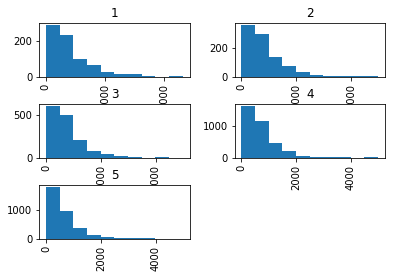

In [6]:
plt.figure(figsize=(12,4))
review.hist(column='text_len', by='stars')

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

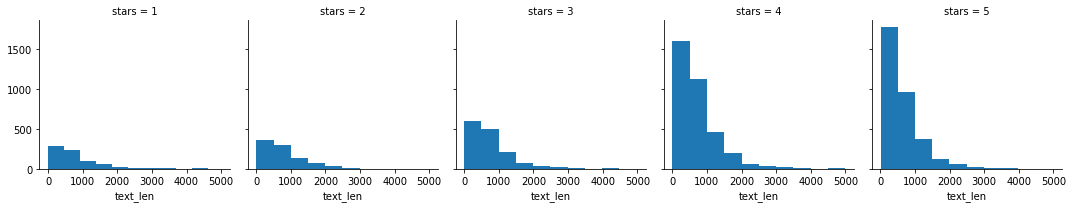

In [7]:
g=sns.FacetGrid(review, col='stars',sharey=True, aspect=1,margin_titles=False )
g.map(plt.hist, 'text_len')

**Create a boxplot of text length for each star category.**

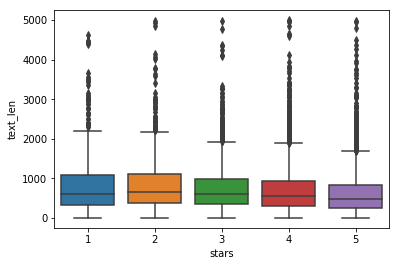

In [8]:
sns.boxplot(y='text_len', x='stars', data=review)

In [9]:
review[review['stars']==1]['text_len'].describe()

count     749.000000
mean      826.515354
std       742.929304
min        11.000000
25%       315.000000
50%       600.000000
75%      1075.000000
max      4618.000000
Name: text_len, dtype: float64

**Create a countplot of the number of occurrences for each type of star rating.**

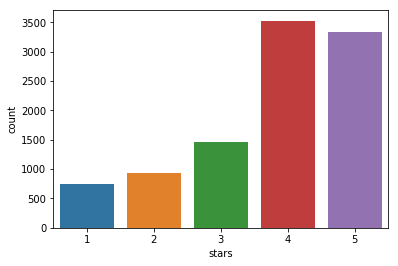

In [10]:
sns.countplot(review['stars'])

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [11]:
review.groupby('stars').mean()

,cool,useful,funny,text_len
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [12]:
review.groupby('stars').mean().corr()

,cool,useful,funny,text_len
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_len,-0.857664,0.699881,0.843461,1.000000


,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

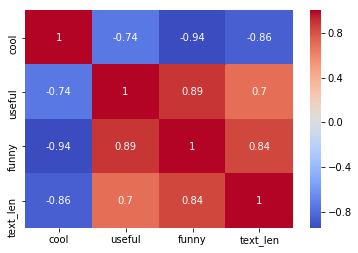

In [13]:
sns.heatmap(review.groupby('stars').mean().corr(), xticklabels=review.groupby('stars').mean().corr().columns,\
            annot=True, cmap='coolwarm')

In [14]:
review['type'].unique()

array(['review'], dtype=object)

In [15]:
review1=review.copy()
review1=review1[['stars','text','cool','useful','funny','text_len']]
review1.head()

,stars,text,cool,useful,funny,text_len
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [16]:
yelp_class=review1[(review1['stars']==1) |(review1['stars']==5)]
yelp_class

,stars,text,cool,useful,funny,text_len
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
6,5,Drop what you're doing and drive here. After I...,7,7,4,1565
9,5,Nobuo shows his unique talents with everything...,0,1,0,186
10,5,The oldish man who owns the store is as sweet ...,1,3,1,298
11,5,Wonderful Vietnamese sandwich shoppe. Their ba...,1,1,0,321
12,5,They have a limited time thing going on right ...,1,2,0,433
17,5,okay this is the best place EVER! i grew up sh...,0,0,0,363


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [70]:
x=yelp_class['text']
y=yelp_class['stars']

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=101)

In [72]:
cv=CountVectorizer()
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [73]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
pred

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [74]:

print(classification_report(y_test,pred))
print(accuracy_score( y_test,pred))
confusion_matrix( y_test,pred)

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

0.9282218597063622


array([[155,  73],
       [ 15, 983]], dtype=int64)

In [75]:
X=yelp_class['text']
Y=yelp_class['stars']

### Pipeline with only count vectorizer

In [76]:
pipeline1=Pipeline([('bow', CountVectorizer()),
                  ('classifier',MultinomialNB())])

In [77]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101) 

In [78]:
pipeline1.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
pred1=pipeline1.predict(x_test)
pred1

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [80]:
print(classification_report(y_test,pred1))
print(accuracy_score( y_test,pred1))
confusion_matrix( y_test,pred1)

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

0.9282218597063622


array([[155,  73],
       [ 15, 983]], dtype=int64)

**Import CountVectorizer and create a CountVectorizer object.**

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

**Now fit nb using the training data.**

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [81]:
import string
def text_process(x):
#     to remove punctuation
    nopunc=[i for i in x if i not in string.punctuation]
    nopunc=''.join(nopunc)
    word_list=nopunc.split()
#     to remove the stop words
    return [word for word in word_list if word.lower() not in nltk.corpus.stopwords.words('english')]
    
    
    

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [66]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101) 

In [68]:

# review['text'][0][12:15]  not in ENGLISH_STOP_WORDS
bow_transformer=CountVectorizer(analyzer=text_process).fit(x_train)

y_train

bow_transformer.get_feature_names()

#  bag of words of train data
bow_train=bow_transformer.fit_transform(x_train)


bow_train.todense()

print(bow_train.shape)
print(bow_train.nnz)
print('Sparsity {}', (100*bow_train.nnz/(bow_train.shape[0]*bow_train.shape[1])))

bow_trans=TfidfTransformer().fit_transform(bow_train)

KeyError: 'text'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
staring_model = MultinomialNB().fit(bow_trans, y_train)

In [ ]:
x_train.shape

In [ ]:
train_predict=staring_model.predict(x_train)
print(classification_report(train_predict, y_train))
print(accuracy_score(train_predict, y_train))
confusion_matrix(train_predict, y_train)

## pipeline with countvectorizer and tf_idf transformer

In [82]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101) 

In [83]:
pipeline2=Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                   ('tf_idf', TfidfTransformer()),
                   ('classification', MultinomialNB())])

In [84]:
pipeline2.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002ABE09EB598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...lse, use_idf=True)), ('classification', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [86]:
pred2=pipeline2.predict(x_test)
pred2

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [ ]:
print(classification_report(y_test, pred2))

print(accuracy_score(y_test, pred2))
display(confusion_matrix(y_test, pred2))

## Pipeline 3

In [71]:
from sklearn.pipeline import Pipeline

pipeline3=Pipeline([
    ('bow_tfidf', TfidfVectorizer(analyzer=text_process)),
        ( 'classifier', MultinomialNB())])

In [72]:
pipeline3.fit(x_train['text'], y_train)

Pipeline(memory=None,
     steps=[('bow_tfidf', TfidfVectorizer(analyzer=<function text_process at 0x00000263DC5C0EA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.float64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), nor...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

** Create a confusion matrix and classification report using these predictions and y_test **

In [73]:
pred3=pipeline.predict(x_test['text'])
pred3

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [74]:
print(classification_report(y_test, pred3))
print(accuracy_score(y_test, pred3))
display(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

0.8140293637846656


C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 228],
       [  0, 998]], dtype=int64)

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



TFidfVectorizer=Count Vectorizer+ TFidTtransformer

In [30]:
# tf_idf=TfidfVectorizer(analyzer=text_process ).fit(x_train['text'])
# tf_train=tf_idf.transform(x_train['text'])
# tf_train


# print(tf_train.todense().shape)
# tf_train.todense()

<7000x35843 sparse matrix of type '<class 'numpy.float64'>'
	with 404772 stored elements in Compressed Sparse Row format>

In [77]:
from sklearn.pipeline import Pipeline

pipeline1=Pipeline([
    ('bow_count', CountVectorizer(analyzer=text_process)),
    ('bow_transformer', TfidfTransformer()),
        ( 'classifier', MultinomialNB())])

** Import Pipeline from sklearn. **

In [79]:
pipeline1.fit(x_train['text'], y_train)

Pipeline(memory=None,
     steps=[('bow_count', CountVectorizer(analyzer=<function text_process at 0x00000263DC5C0EA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [80]:
staring1= pipeline1.predict(x_test['text'])

In [81]:
print(classification_report(y_test, staring1))
print(accuracy_score(y_test, staring1))
display(confusion_matrix(y_test, staring1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

0.8140293637846656


C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 228],
       [  0, 998]], dtype=int64)

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!